**Importing libraries**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



**Loading Dataset and Dataset details**

In [104]:
data=pd.read_csv("/content/1553768847-housing.csv (1).zip")

In [105]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [106]:
data.shape

(20640, 10)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [108]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Handling missing values**

In [109]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


**Checking unnecessary columns and drops**

In [110]:
data.nunique()

,0
longitude,844
latitude,862
housing_median_age,52
total_rooms,5926
total_bedrooms,1923
population,3888
households,1815
median_income,12928
ocean_proximity,5
median_house_value,3842


**Preprocessing**

In [111]:
data = data.drop_duplicates()

In [112]:
# numeric columns: fill missing with median; categorical with mode
num_cols = data.select_dtypes(include=["number"]).columns.tolist()
cat_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()

# numeric imputation
for c in num_cols:
    data[c].fillna(data[c].median(), inplace=True)

# categorical imputation
for c in cat_cols:
    data[c].fillna(data[c].mode()[0], inplace=True)

print("After imputation missing counts:\n", data.isnull().sum())

After imputation missing counts:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


/tmp/ipython-input-4060407783.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[c].fillna(data[c].median(), inplace=True)
/tmp/ipython-input-4060407783.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**Outlier removal (IQR) — numeric only**



In [113]:
# Work only with numeric columns for IQR
numeric = data.select_dtypes(include=["number"]).copy()
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1

# boolean mask of rows without outliers (for any numeric column)
non_outlier_mask = ~((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))).any(axis=1)
print("Rows before outlier removal:", data.shape[0])
data = data[non_outlier_mask].reset_index(drop=True)
print("Rows after outlier removal:", data.shape[0])


Rows before outlier removal: 20640
Rows after outlier removal: 17609


In [114]:
# change this to your real target column name
TARGET_COL = "median_house_value"   # <<== set this correctly

if TARGET_COL not in data.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found. Available columns: {df.columns.tolist()}")

X = data.drop(columns=[TARGET_COL])
y = data[TARGET_COL]


In [115]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (or use imputation if needed)
data.dropna(inplace=True)

# Optional: Rename target column
data.rename(columns={'median_house_value': 'target'}, inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


**Exploratory Data Analysis (EDA)**

In [116]:
print(data.duplicated().sum)

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
17604    False
17605    False
17606    False
17607    False
17608    False
Length: 17609, dtype: bool>


**correlation heatmap**

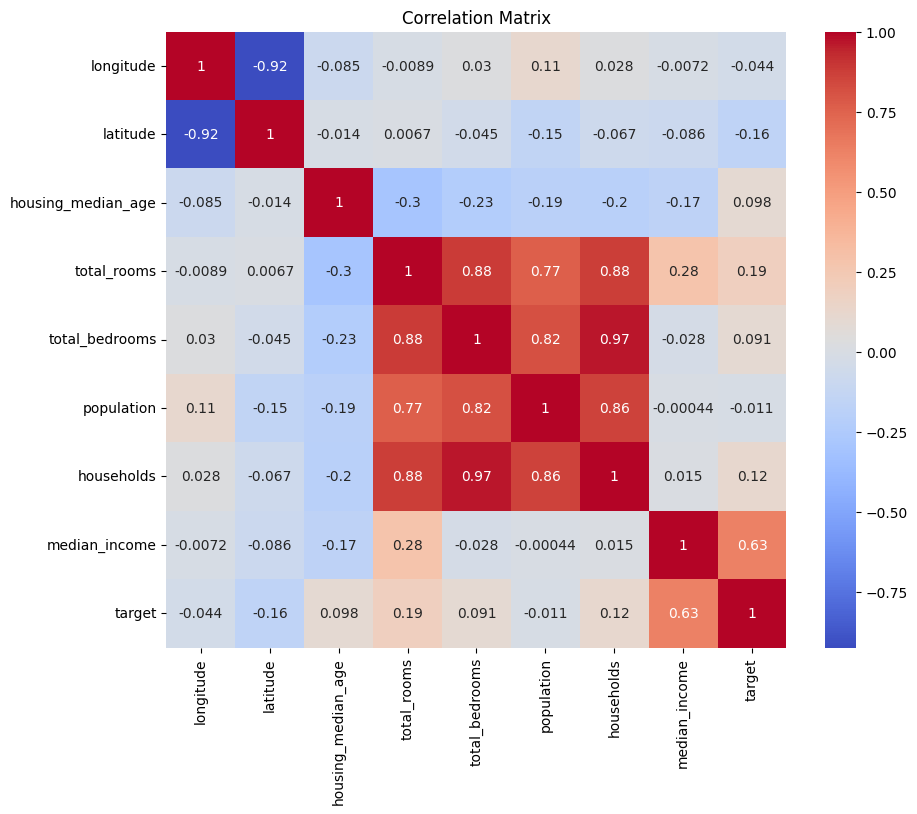

In [117]:
# Drop non-numeric columns for correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Distribution of math score**

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'target'],
      dtype='object')


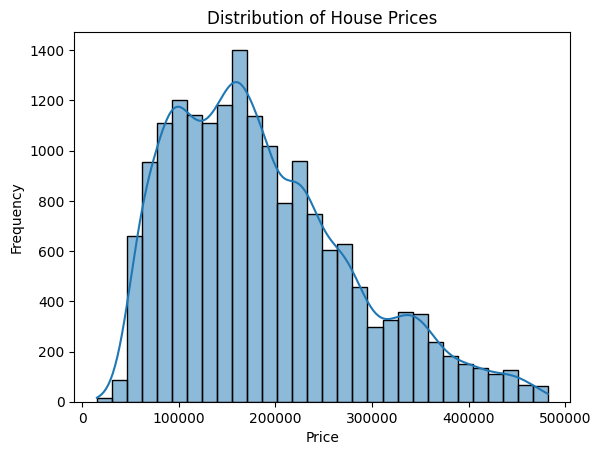

In [118]:
# Check column names to ensure the price column is correctly named
print(data.columns)

# Plot distribution of house prices using the correct column name
sns.histplot(data['target'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Bar Graph**

/tmp/ipython-input-4294260974.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_means.index, y=feature_means.values, palette='coolwarm')


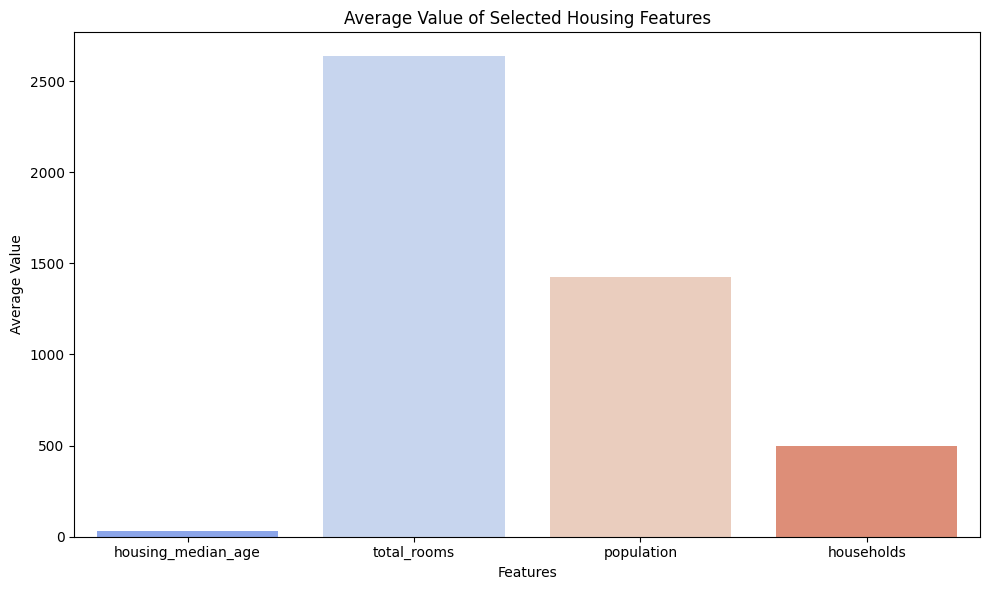

In [119]:
data = pd.read_csv("/content/1553768847-housing.csv (1).zip")

# Drop missing values if any
data.dropna(inplace=True)

# Select numerical columns you want to visualize
features_to_plot = ['housing_median_age', 'total_rooms', 'population', 'households']

# Calculate mean of selected features
feature_means = data[features_to_plot].mean()

# ✅ Now we can plot using feature_means
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_means.index, y=feature_means.values, palette='coolwarm')
plt.title("Average Value of Selected Housing Features")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


**Pie Chart**

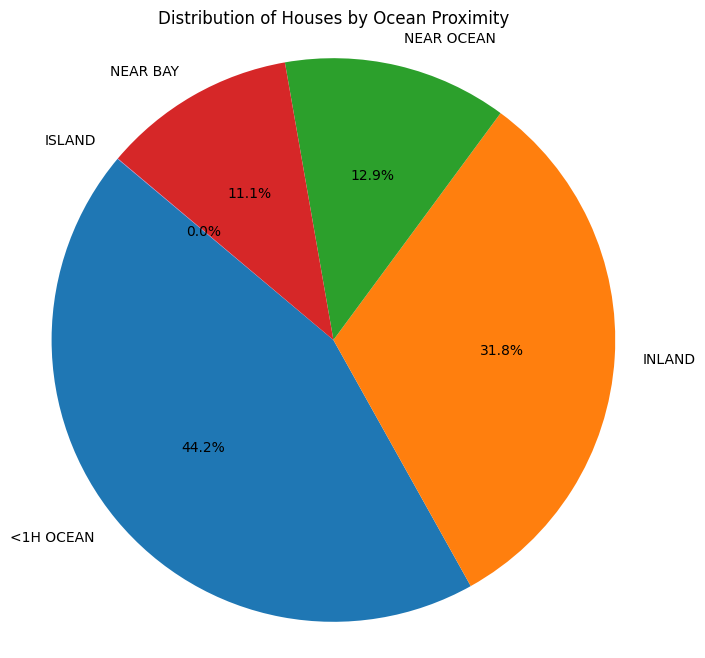

In [120]:
# Count the number of records in each category
category_counts = data['ocean_proximity'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Houses by Ocean Proximity")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Prepare Data for Training**

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Train Linear Regression Model**

In [122]:
# 1️⃣ Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2️⃣ Load dataset (unzipped file path or zipped with compression)
data = pd.read_csv("/content/1553768847-housing.csv (1).zip")  # if unzipped

# 3️⃣ Separate features and target
X = data.drop(columns=["median_house_value"])  # correct target name
y = data["median_house_value"]

# 4️⃣ Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# 5️⃣ Preprocessing: impute missing values + encode categorical
numeric_transformer = SimpleImputer(strategy="mean")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# 6️⃣ Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 7️⃣ Create pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 8️⃣ Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9️⃣ Train the model
model.fit(X_train, y_train)

# 🔟 Predict
y_pred = model.predict(X_test)

# 1️⃣1️⃣ Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.6257344555133741
Mean Squared Error: 4904409297.414935


**Evaluate the Model**

In [123]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 4904409297.414935
R² Score: 0.6257344555133741


**Visualization of Predictions**

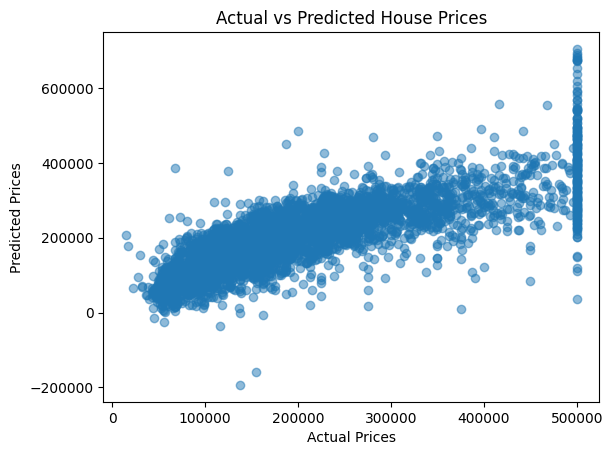

In [124]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
